In [3]:
pip install matplotlib


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



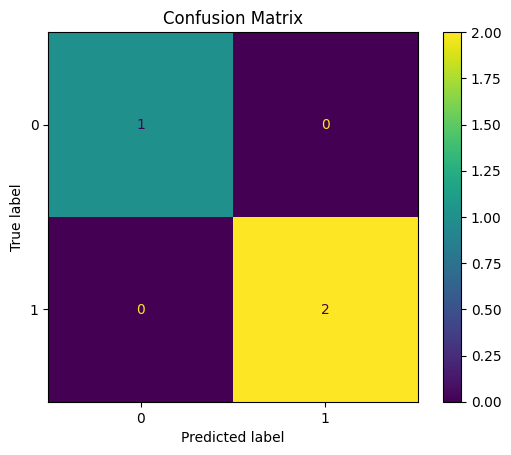

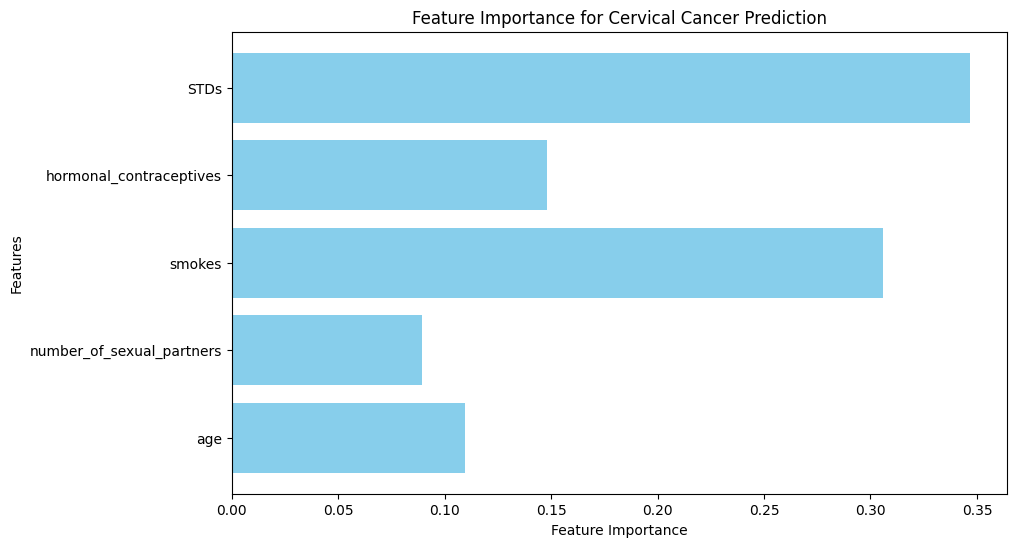

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Example synthetic dataset
data = {
    'age': [29, 34, 45, 50, 23, 32, 41, 53, 30, 39],
    'number_of_sexual_partners': [1, 3, 2, 1, 2, 3, 2, 4, 1, 2],
    'smokes': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'hormonal_contraceptives': [1, 0, 1, 1, 0, 1, 0, 0, 1, 0],
    'STDs': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'cervical_cancer': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
}

# Load dataset into a DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df.drop('cervical_cancer', axis=1)
y = df['cervical_cancer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Save and display confusion matrix
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Feature Importance
feature_importances = rf_clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Cervical Cancer Prediction')
plt.savefig('feature_importance.png')
plt.show()
